# The Variational Principle

$$ \hat{H}\psi = E\psi $$

$$ [-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}+V(x)]\psi=E\psi $$

All the imports

In [76]:
import math
import numpy
import matplotlib.pyplot as plt
from scipy import integrate

# Definitions:

The accuracy to get the energy to converge to

In [77]:
accuracy = 10**-6

The bounds for the problem

_x_min_ is the minimum value of x,

_x_max_ is the maximum value of x,

_x_step_ is the spacing between values,

_number _samples_ is the integer to define
the total number of samples to take, actual value is
$2^n +1 $ 

visual display of $ 2^k +1$ for reference, for k N

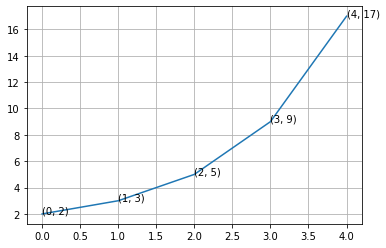

In [78]:
k_max = 5
k = numpy.arange(0, k_max, 1)
y = 2**k + 1

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(k, y)
for xy in zip(k, y):                                       
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') 

plt.grid()
plt.show()

In [79]:
x_min = -10
x_max = -x_min
n = 10
number_samples = 2**n + 1 # for romberg integration
x_step = (x_max - x_min) / number_samples # make the step accurate

Calculate the _x_ variable

In [80]:
x = numpy.linspace(x_min, x_max, number_samples)

Pre-calculate the Hamiltonian factors, as they get reused quite a lot

In [81]:
h_bar = 1
# h_bar = 6.62607015* 10**-34 / (2 * numpy.pi)
# h_bar = 6.62607015* 10**-3 / (2 * numpy.pi) # from wikipedia (less 10**-31)
m = 1
# m = 9.1093837015 *10**-31 #kg (from wikipedia)
# m = 9.1093837015 #kg (from wikipedia) (less 10**-31)
factor = -h_bar**2 / (2 * m)

Define the potential function, is a scalar function

In [82]:
def potential(x :numpy.ndarray):
    k = 0.01
    return 0.5 * k * x**2
    # return numpy.zeros(number_samples)

Define the Hamiltonian operator

In [83]:
# V is the potential,
# psi is the wavefunction
def hamiltonian(V :numpy.ndarray):
    grad = numpy.gradient
    def foo(psi :numpy.ndarray):
        Vp = V * psi # The potential energy
        Tp = factor * grad(grad(psi)) # The kinetic energy
        return Tp + Vp
    return foo

In [84]:
def normalise_psi(psi: numpy.ndarray):
    psi_star = psi.conj()
    mag_psi = psi_star * psi

    norm = integrate.romb(mag_psi)
    norm_psi = psi / numpy.sqrt(norm)

    return norm_psi

Function to evaluate the energy expectation value

In [85]:
def expectation_value(Q, psi: numpy.ndarray):
    # TODO: add check for if it's already normalised?
    # may be more efficient when large arrays are involved
    psi = normalise_psi(psi)
    psi_star = psi.conjugate()
    integrand = psi_star * Q(psi)

    return integrate.romb(integrand)

In [99]:
def energy_expectation(psi :numpy.ndarray):
    V = potential(x)
    H = hamiltonian(V)
    return expectation_value(H, psi)

test run

In [106]:
L = x_max
k = 3 * numpy.pi / L

psi = numpy.sin(k * x) + numpy.cos(k * x)
# psi = normalise_psi(psi)

E = energy_expectation(psi)
print(E)

0.16683590000470405
0.16683590000470405


Verification of $\int{|\psi|^2dx}=A^2=1$ and $ <{Q}>, <{E}> $.

In [107]:
magnitude_psi = expectation_value(lambda x: x, psi)
print(magnitude_psi)
norm_psi = normalise_psi(psi)
magnitude_psi = expectation_value(lambda x: x, psi)
print(magnitude_psi)

1.0
1.0


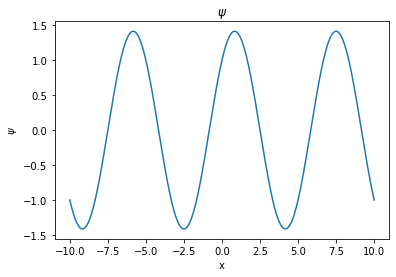

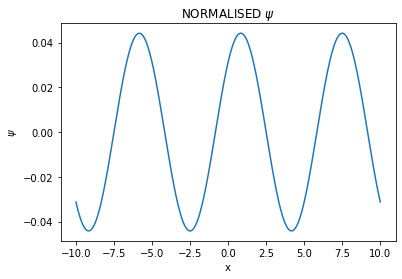

In [89]:
plt.plot(x, psi)
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("$\psi$")
plt.show()

plt.plot(x, norm_psi)
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("NORMALISED $\psi$")
plt.show()

In [108]:
pi = numpy.pi
psi = numpy.sin((1 * pi / L) * x)
E = energy_expectation(psi)
# expected_E = (1**2 * pi**2 * h_bar**2)/(2 * m * L**2)
omega = 1
expected_E = (1 + 1/2) * h_bar * omega

print("E:", E)
print("Expected E:", expected_E)

E: 0.1413551952962961
Expected E: 1.5


Plotting of the potential and $\psi$

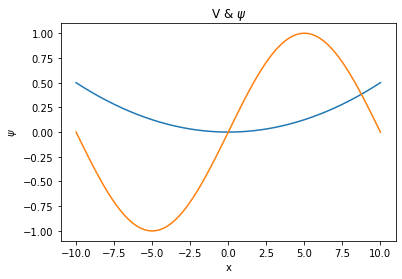

In [91]:
plt.plot(x, potential(x))
plt.title("V & $\psi$")
plt.xlabel("x")
plt.ylabel("V")
plt.plot(x, psi)
plt.ylabel("$\psi$")
plt.show()

In [92]:
def tweak_psi(psi, index, amount):
    new_psi = psi.copy()
    new_psi[index] += amount
    return new_psi

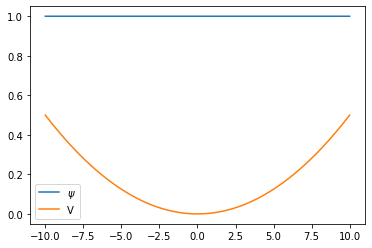

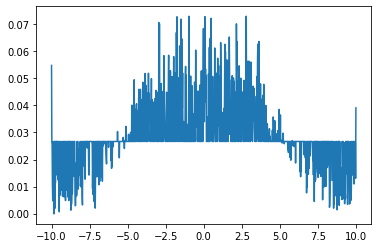

In [93]:
import random

# number_iterations = 5000
number_iterations = 1000
# number_iterations = 50000
psi = numpy.linspace(1, 1, number_samples)
plt.plot(x, psi)
plt.plot(x, potential(x))
plt.legend(("$\psi$", "V"))
plt.show()

seed = "The Variational Principle"
rand = random.seed(seed)

for i in range(number_iterations):
    rand_x = random.randrange(0, number_samples)
    
    value = psi[rand_x]
    
    rand_tweak = random.random()
    
    psi_up = tweak_psi(psi, rand_x, +rand_tweak)
    psi_down = tweak_psi(psi, rand_x, -rand_tweak)
    
    E_up = energy_expectation(psi_up)
    E_down = energy_expectation(psi_down)
    E = energy_expectation(psi)
    
    if E_up < E_down and E_up < E:
        psi = psi_up
    elif E_down < E_up and E_down < E:
        psi = psi_down
    

psi = normalise_psi(psi)
plt.plot(x, psi)
# plt.plot(x, potential(x))
plt.show()

In [94]:
saved_psi = psi

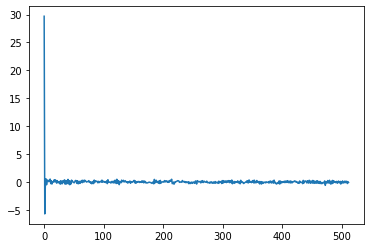

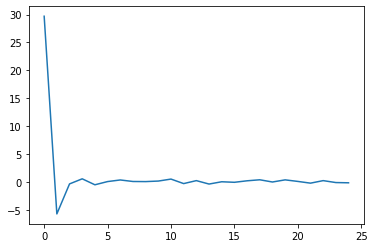

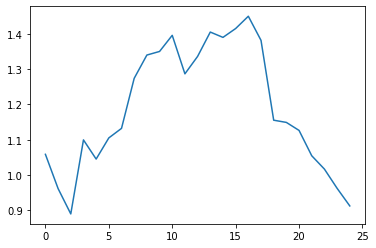

In [95]:
import scipy.fftpack as fftpack

psi = saved_psi

fft_psi = fftpack.fft(psi)
fft_psi = fft_psi[:int(len(fft_psi) / 2)]
# plt.plot(x, fft_psi)
plt.plot(fft_psi)
plt.show()

fft_psi = fft_psi[:25]
plt.plot(fft_psi)
plt.show()

psi = fftpack.ifft(fft_psi)
plt.plot(psi)
plt.show()
